## Importación de librerías

In [1]:
import pandas as pd
import numpy as np

## Carga de datos

Vamos a tratar las columnas de fechas `dateCrawled`, `dateCreated`,`lastSeen` como tipo de dato Datetime

In [9]:
df = pd.read_csv("../data/raw/autorenew.csv", parse_dates=["dateCrawled", "dateCreated","lastSeen"])

## Análisis preliminar

In [46]:
df.sample(10)

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
147197,Audi_TT,private,offer,11999,coupe,2006,automatic,197.0,tt,125000,10,petrol,audi,yes,0,73432
244267,Ford_Focus_Trend_2_0_16V,private,offer,1350,NaN,1999,manually,129.0,focus,150000,10,petrol,ford,no,0,66740
78184,Bastlerauto_Ford_Fiesta,private,offer,250,small car,1997,NaN,0.0,fiesta,60000,3,petrol,ford,no,0,4567
169486,Mercedes_C_220_cdi_T_Classic,private,offer,2900,combi,2002,automatic,143.0,c_klasse,150000,6,diesel,mercedes_benz,no,0,79848
15616,Suzuki_Jimny_Ranger,private,offer,8700,suv,2010,manually,85.0,jimny,90000,3,petrol,suzuki,no,0,54341
277073,Audi_A3_1.6_Ambition,private,offer,1799,NaN,1997,manually,100.0,a3,150000,4,petrol,audi,no,0,31246
198053,Opel_Corsa_B_Bj_2000_kein_Tuev,private,offer,99,small car,2000,manually,53.0,corsa,150000,12,petrol,opel,NaN,0,21035
142773,VW_Touran_1_9_TDI_Highline_Grau,private,offer,8500,NaN,2017,manually,104.0,touran,125000,3,NaN,volkswagen,no,0,41468
356483,Touran_2.0_TDI_DPF_Highline,private,offer,3100,NaN,2007,NaN,0.0,touran,150000,11,diesel,volkswagen,no,0,36043
290054,BMW_523i_Touring_Aut._Komfortsitze_Nappa_NavPro,private,offer,16200,combi,2009,automatic,187.0,5er,125000,8,petrol,bmw,no,0,2977


In [13]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 371528 filas y 19 columnas


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   vehicleType          237765 non-null  object        
 6   yearOfRegistration   371528 non-null  int64         
 7   gearbox              351319 non-null  object        
 8   powerCV              371528 non-null  float64       
 9   model                351044 non-null  object        
 10  kilometer            371528 non-null  int64         
 11  monthOfRegistration  371528 non-null  int64         
 12  fuelType             338142 non-null  object        
 13  brand         

## Columnas del Dataset

- **`dateCrawled`** fecha y hora en la que se han recopilado los datos del coche
- **`name`** nombre del anuncio, incluye marca y modelo del coche.
- **`seller`** Tipo de vendedor (Particular o concesionario)
- **`offerType`** tipo de oferta (venta o subasta)
- **`price`** precio del coche, no sabemos la divisa
- **`vehicleType`** tipo vehiculo, (sedán , SUV, compacto...)
- **`yearOfRegistration`** año de matriculación del coche
- **`gearbox`** Tipo de transmisión, (manual o automática)
- **`powerCV`** Potencia del coche en caballos (CV)
- **`model`** Modelo del coche
- **`kilometer`** kilometraje total del coche
- **`monthOfRegistration`** Mes de matriculación
- **`fuelType`** Tipo de combustible (gasolina, diese, electrico...)
- **`brand`** Marca del coche
- **`notRepairedDamage`** Indica si el coche tiene daños sin reparar
- **`dateCreated`** Fecha de creacion (anuncio)
- **`nrOfPictures`** Número de fotos (anuncio)
- **`postalCode`** Código postal de la ubicación del coche
- **`lastSeen`** Última fecha y hora en la se visualizó el anuncio


### Análisis de fechas
Comprobar los valores únicos de los años para conocer el intervalo de tiempo

In [18]:
columnas_fechas = ['dateCrawled', 'dateCreated', 'lastSeen']

for col in columnas_fechas:
     print(f"Valores únicos de los años para {col}: {df[col].dt.year.unique()}")

Valores únicos de los años para dateCrawled: [2016]
Valores únicos de los años para dateCreated: [2016 2015 2014]
Valores únicos de los años para lastSeen: [2016]


- Los datos se extrajeron exclusivamente en 2016
- Los anuncios son entre 2014 y 2016
- Asumeremos que los vehiculos mass nuevos solo pueden ser de 2016 en lugar del año actual
- Aparte de eso, estas columnas no aportan valor adicional, por tanto, las eliminaremos

In [ ]:
df = df.drop(columns=columnas_fechas)

## Duplicados

Ahora que hemos eliminado las fechas, comprobemos los duplicados. Es posible que un mismo vehículo haya sido registrado múltiples veces en diferentes fechas.

In [31]:
df.duplicated().sum()

6624

In [32]:
round(df.duplicated().mean() * 100, 2)

1.78

Hay 6624 duplicados (1.78 %), los eliminamos.

In [34]:
df = df.drop_duplicates()

## Valores nulo
Comprobar el total de valores nulos del dataset

In [39]:
nulos = df.isna().sum()
nulos[nulos > 0]

vehicleType          131462
gearbox               19806
model                 20294
fuelType              33084
notRepairedDamage     70776
dtype: int64

Veamos si son muchos o pocos nulos

In [40]:
nulos_porc = df.isna().mean() * 100
nulos_porc[nulos_porc > 0].round(2)

vehicleType          36.03
gearbox               5.43
model                 5.56
fuelType              9.07
notRepairedDamage    19.40
dtype: float64

Vemos que hay pocas columnas con valores nulos, de las cuales:
- `gearbox` y `model`: apenas un 5%, pocos nulos
- `fuelType`: un 9%, pocos nulos
- `notRepairedDamage`: 19% de nulos, cantidad moderada
- `vehicleType`: 36%, cantidad alta          

## Variables numéricas

In [43]:
columnas_num = df.select_dtypes(include='number').columns
columnas_num

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration', 'nrOfPictures', 'postalCode'],
      dtype='object')

In [45]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,364904.0,17502.27,3620372.48,0.0,1150.0,2950.0,7150.0,2.147484e+09
yearOfRegistration,364904.0,2004.58,93.55,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,364904.0,113.93,190.97,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,364904.0,125685.07,40090.32,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,364904.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,364904.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,364904.0,50944.55,25775.64,1067.0,30655.0,49688.0,71642.0,9.999800e+04


Observaciones variables numéricas
- `price`:El precio mínimo es cero, un coche gratis no tiene sentido. La media es mucho mayor que la mediana, lo que puede indicar la presencia de numerosos valores atípicos, posiblemente vehiculos de lujo. Precio maximo es un valor incoherente (1e9 mil millones) probablementes debido a errores.
- `yearOfRegistration`: El valor mínimo es 1000 valor incoherente, tambien hay valores de 9999 posibles errores en la introducción de datos
- `powerCV`:valores min y max incoherentes (0 y 19.700).El resto parecen razonables, estando en un rantgo típico entre 50 y 150 CV
- `kilometer`: Valores que parecen razonables, media y mediana similares, sugiere una distribución mas uniforme.
- `monthOfRegistration`: Es un falso numérico, variable categórica. Valor minimo en cero es imposible
- `nrOfPictures`: Todos los valores son 0, la eliminamos
- `postalCode` : Codigos postales, realmente variable categórica. no tenemos informacion sobre el pais al que pertenecen, ni una forma de determinarlo, lo que limita su utilidad para el análisis. Por el nombre de algunas entradas sospechamos que podria ser Alemania, al no tener forma de confirmarlo, decidimos eliminarla.


In [47]:
df = df.drop(columns=['postalCode', 'nrOfPictures'])

## Histogramas

In [52]:
import matplotlib.pyplot as plt     
import seaborn as sns 

In [59]:
columnas_num = df.select_dtypes(include='number').columns

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


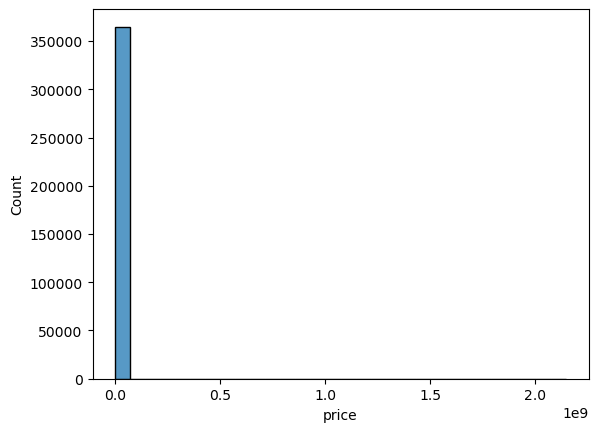

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


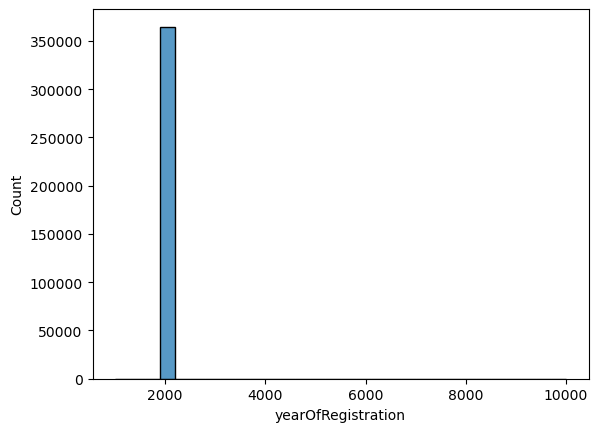

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


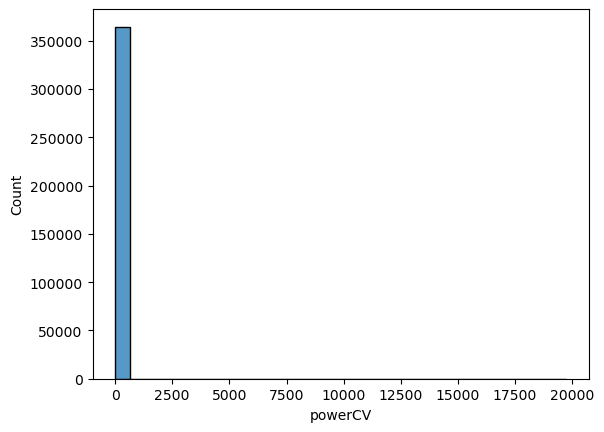

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


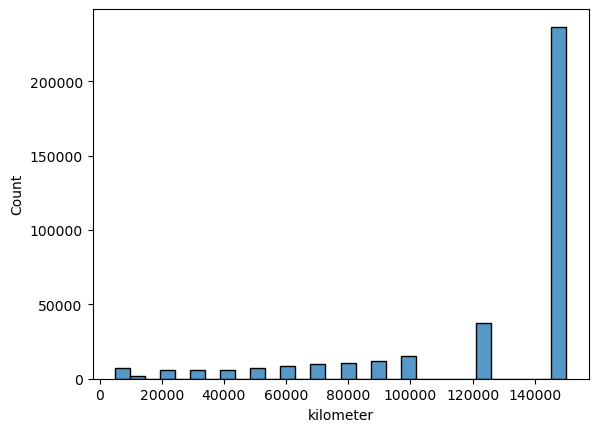

c:\Users\mctra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


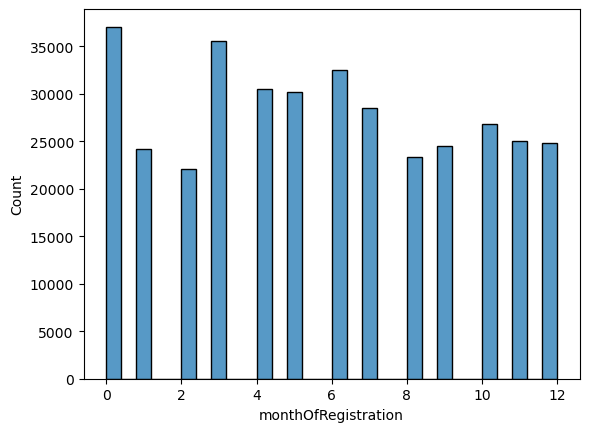

In [60]:
for col in columnas_num:

     plt.figure()
     sns.histplot(df[col], bins=30)
     plt.show()

## Boxplot

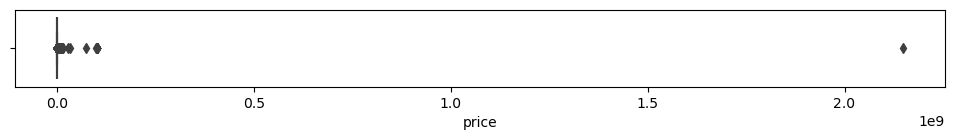

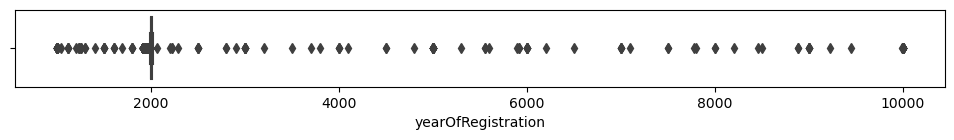

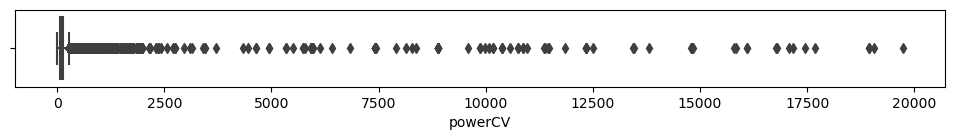

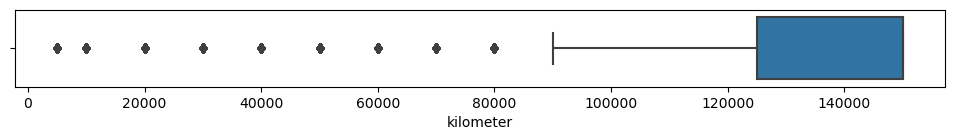

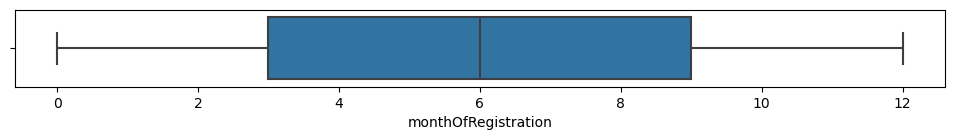

In [65]:
for col in columnas_num:

     plt.figure(figsize=(12, 1))
     sns.boxplot(x=df[col])
     plt.show()